# 큐(Queue)
## 큐(Queue)의 특성
- 스택과 마찬가지로 삽입과 삭제의 위치가 제한적인 자료구조
  - 큐의 뒤에서는 삽입만 하고, 큐의 앞에서는 삭제만 이루어지는 구조

- **선입선출구조**(FIFO: First In First Out)
  - 큐에 삽입한 순서대로 원소가 저장되어, 가장 먼저 삽입(First In)된 원소는 가장 먼저 삭제(First Out)된다.

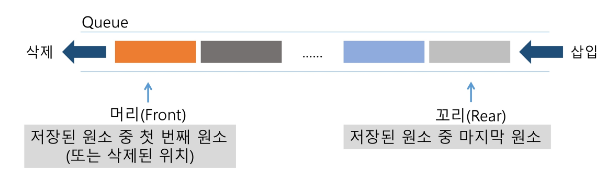

- 큐의 기본 연산
  - 삽입 : enQueue

  - 삭제 : deQueue

## 큐의 주요 연산
|연산|기능|
|-|-|
|enQueue(item)|큐의 뒤쪽(rear 다음)에 원소를 삽입하는 연산|
|deQueue()|큐의 앞쪽(front)에서 원소를 삭제하고 반환하는 연산|
|CreateQueue()|공백 상태의 큐를 생성하는 연산|
|isEmpty()|큐가 공백상태인지를 확인하는 연산|
|isFull()|큐가 포화상태인지를 확인하는 연산|
|Qpeek()|큐의 앞쪽(fornt)에서 원소를 삭제없이 반환하는 연산|


## 큐의 연산 과정

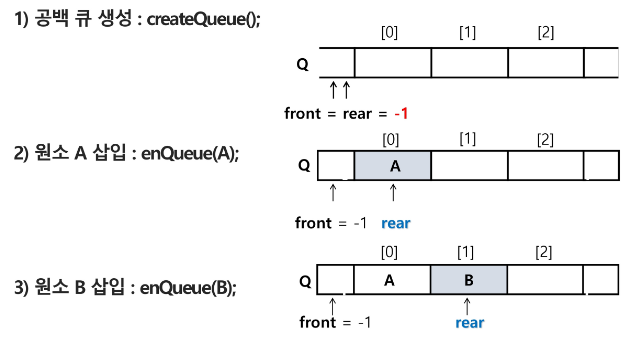

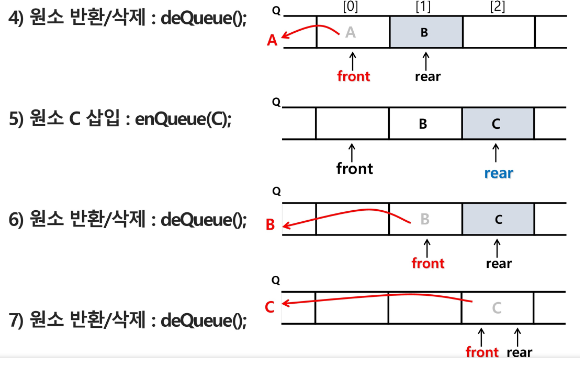

In [5]:
N = 10
q = [0] * N

front = -1
rear = -1

rear += 1
q[rear] = 1
rear += 1
q[rear] = 2
rear += 1
q[rear] =3 

front += 1
print(q[front])
front += 1
print(q[front])
front += 1
print(q[front])

q2 =[]
q2.append(10)
q2.append(20)
print(q2.pop(0))
print(q2.pop(0))

print(q)

1
2
3
10
20
[1, 2, 3, 0, 0, 0, 0, 0, 0, 0]


## 큐의 구현 
### 선형큐
- 1차원 배열을 이용한 큐
  - 큐의 크기 = 배열의 크기

  - front 저장된 첫 번째 원소의 인덱스

  - rear 저장된 마지막 원소의 인덱스

- 상태표현
  - 초기 상태 : front = rear = -1

  - 공백 상태 : front == rear

  - 포화 상태 : rear == n-1 (n: 배열의 크기, n-1: 배열의 마지막 인덱스)
### 초기 공배 큐 생성 
- 크기 n인 1차원 배열 생성

- front와 rear를 -1로 초기화
### 삽입 : enQueue(item)
- 마지막 원소 뒤에 새로운 원솔르 삽입하기 위해
  1. rear 값을 하나 증가시켜 새로운 원소를 삽입할 자리를 마련

  2. 그 인덱스에 해당하는 배열원소 Q[rear]에 item을 저장 

```sh
def enQueue(item)
  global rear
  if isFull() : print("Queue_Full")
  else: 
    rear = rear + 1
    Q[rear] = item
```

### 삭제 : deQueue()
- 가장 앞에 있는 원소를 삭제하기 위해
  1. front 값을 하나 증가시켜 큐에 남아있는 첫 번째 원소 이동

  2. 새로운 첫 번째 원소를 리턴 함으로써 삭제와 동일한 기능함

```sh
deQueue()
  if(isEmpty()) then Queue_Empty();
  
  else{
    front = front + 1;
    return Q[front];
  }
```

### 공백상태 및 포화상태 검사 : isEmpty(), isFull()
- 공백상태 : front == rear

- 포화상태 : rear == n-1 (n: 배열의 크기, n-1: 배열의 마지막 인덱스)

```sh
def isEmpty():
  return front == rear

def isFull():
  return rear == len(Q) - 1
```

### 검색 : Qpeek()
- 가장 앞에 있는 원소를 검색하여 반환하는 연산

- 현재 front의 한자리 뒤(front+1)에 있는 원소, 즉 큐의 첫 번째에 있는 원소를 반환

```sh
def Qpeek():
  if isEmpty(): 
    print("Queue_Empty")
  else: 
    return Q[front+1]
```

## 원형큐
### 선형 큐 이용시의 문제점
- 잘못된 포화상태 인식
  - 선형 큐를 이용하여 원소의 삽입과 삭제를 계속할 경우, 배열의 앞부분에 활용할 수 있는 공간이 있음에도 불구하구, rear = n-1 인 상태 즉, 포화상태로 인식하여 더 이상의 삽입을 수행하지 않게 됨

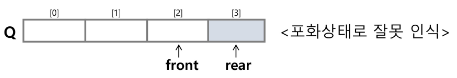

- 해결방법1
  - 매 연산이 이루어질 때마다 저장된 원소들을 배열의 앞부분으로 모두 이동시킴

  - 원소 이동에 많은 시간이 소요되어 큐의 효율성이 급격히 떨어짐

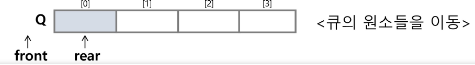

- 해결방법2
  - 1차원 배열을 사용하되, 논리적으로는 배열의 처음과 끝이 연결되어 원형 형태의 큐를 이룬다고 가정하고 사용

  - 원형 큐의 논리적 구조

  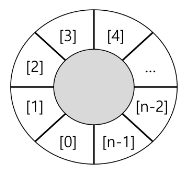

- 초기 공백 상태
  front = rear = 0

- index의 순환
  - front와 rear의 위치가 배열의 마지막 인덱스인 n-1를 가리킨 후, 그 다음에는 논리적 순환을 이루어 배열의 처음 인덱스인 0으로 이동해야 함

  - 이를 위해 나머지 연산자 mod를 사용함 

- front 변수
  - 공백 상태와 포화 상태 구분을 쉽게 하기 위해 front가 있는 자리는 사용하지 않고 항상 빈자리로 둠

- 삽입 위치 및 삭제 위치

||삽입 위치|삭제 위치|
|-|-|-|
|선형큐|rear = rear + 1|front = front + 1|
|원형큐|rear = (rear+1) mod n|front = (front + 1) mod n|

### 원형 큐의 구현
- 초기 공백 큐 생성
  - 크기 n인 1차원 배열 생성

  - front와 rear를 0으로 초기화

- 공백상태 및 포화상태 검사 : isEmpty(), isFull()
  - 공백상태 : front == rear
  
  - 포화상태 : 삽입할 rear의 다음 위치 == 현재 front
    - (rear+1) mod n == front

```sh
def isEmpty():
  return front == rear

def isFull():
  return (rear+1) % len(cQ) == front
```

- 삽입 : enQueue(item)
  - 마지막 원소 뒤에 새로운 원소를 삽입하기 위해
    1. rear 값을 조정하여 새로운 원소를 삽입할 자리를 마련함 :
    rear = (rear+1) mod n;

    2. 그 인덱스에 해당하는 배열원소 cQ[rear]에 item을 저장

- 삭제 : deQueue(), delete()
  - 가장 앞에 있는 원소를 삭제하기 위해
    1. front 값을 조정하여 삭제할 자리를 준비함

    2. 새로운 front 원소를 리턴 함으로써 삭제와 동일한 기능함  

In [6]:
Q_SIZE = 4 
cQ = [0] * Q_SIZE
front = rear = 0

rear = (rear+1) % Q_SIZE # enq 1
cQ[rear] = 1

rear = (rear+1) % Q_SIZE # enq 2
cQ[rear] = 2

rear = (rear+1) % Q_SIZE # enq 3
cQ[rear] = 3

front = (front+1)% Q_SIZE
print(cQ[front])

rear = (rear+1) % Q_SIZE # enq(10)
cQ[rear] = 10

rear = (rear+1) % Q_SIZE # enq(20)
cQ[rear] = 20

1


## 연결 큐
### 연결 큐의 구조
- 단순 연결 리스트(Linked List)를 이용한 큐
  - 큐의 원소: 단순 연결 리스트의 노드

  - 큐의 원소 순서: 노드의 연결 순서. 링크로 연결되어 있음

  - front: 첫 번째 노드를 가리키는 링크

  - rear: 마지막 노드를 가리키는 링크

- 상태 표현
  - 초기 상태: front = rear = null

  - 공백 상태: front = rear = null

## (참고) deque(덱)
- 컨테이너 자료형 중 하나

- deque 객체
  - 양쪽 끝에서 빠르게 추가와 삭제를 할 수 있는 리스트류 컨테이너

- 연산
  - append(x) : 오른쪽에 x 추가

  - popleft() : 왼쪽에서 요소를 제거하고 반환. 요소가 없으면 indexError

```sh
from collections import deque

q = deque()
q.append(1)  # enqueue()
t = q.popleft() # dequeu()
```

## 우선순위 큐 (Priority Queue)
- 우선순위 큐의 특성
  - 우선순위를 가진 항목들을 저장하는 큐

  - FIFO 순서가 아니라 우선순위가 높은 순서대로 먼저 나가게 된다.

- 우선순위 큐의 적용 분야
  - 시뮬레이션 시스템

  - 네트워크 트래픽 제어

  - 운영체제의 데스크 스케줄링 

- 우선순위 큐의 구현
  - 배열을 이용한 우선순위 큐

  - 리스트를 이용한 우선순위 큐

- 우선순위 큐의 기본 연산
  - 삽입: enQueue

  - 삭제: deQueue

- 배열을 이용하여 우선순위 큐 구현
  - 배열을 이용하여 자료 저장

  - 원소를 삽입하는 과정에서 우선순위를 비교하여 적절한 위치에 삽입하는 구조

  - 가장 앞에 최고 우선순위 원소가 위치하게 됨

- 문제점
  - 배열을 사용하므로, 삽입이나 삭제 연산이 일어날 때 원소의 재배치가 발생함

  - 이에 소요되는 시간이나 메모리 낭비가 큼
## 버퍼
- 버퍼
  - 데이터를 한 고셍서 다른 한 곳으로 전송하는 동안 일시적으로 그 데이터를 보관하는 메모리의 영역

  - 버퍼링: 버퍼를 활용하는 방식 또는 버퍼를 채우는 동작을 의미한다.

- 버퍼의 자료 구조
  - 버퍼는 일반적으로 입출력 및 네트워크와 관련된 기능에서 이용된다.

  - 순서대로 입력/출력/전달되어야 하므로 FIFO 방식의 자료구조인 큐가 활용된다.

In [21]:
# 큐 -> 선입선출
# 선형큐 

QSIZE = 4
Q = [0] * QSIZE

front = rear = -1   # head/tail

# stack top은 마지막에 저장되는 값이었음
# rear도 가장 마지막에 저장되는 값이었음 

def enQueue(item):
    global rear
    # full check -> rear == QIZE - 1
    if rear == QSIZE - 1:
        print('Full 이라구요!!!')
        return 
    rear+=1
    Q[rear] = item

def deQueue():
    global front
    # empty check -> front = rear 
    if front == rear:
        print("비었다구요")
        return
    front += 1
    return Q[front]

for i in range(QSIZE):
    enQueue(i)
print(Q)

while front != rear:
    print(deQueue())
    


[0, 1, 2, 3]
0
1
2
3


In [24]:
# 원형큐

QSIZE = 4
Q = [0] * QSIZE
front = rear = 0 

def enQueue(item):
    global rear
    # full check -> rear == 
    if (rear + 1) % QSIZE == front:
        print('Full 이라구요!!!')
        return 
    rear = (rear + 1) % QSIZE
    Q[rear] = item

for i in range(5):
    enQueue(i)
print(Q)

while front != rear:
    print(deQueue())


Full 이라구요!!!
Full 이라구요!!!
[0, 0, 1, 2]
0
1
2


## BFS (Breadth First Search)
- 그래프를 탐색하는 방법에는 크게 두 가지가 있음
  - 깊이 우선 탐색(Depth First Search, DFS)

  - 너비 우선 탐색(Breadth First Search, BFS)

- 너비 우선 탐색은 탐색 시작점의 인접한 정점들을 먼저 모두 차례로 방문한 후에, 방문했던 정점을 시작점으로 하여 다시 인접한 정점들을 차례로 방문하는 방식

- 인접한 정점들에 대해 탐색을 한 후, 차례로 다시 너비 우선 탐색을 진행해야 하므로, 선입선출 형태의 자료구조인 큐를 활용함 

In [ ]:
def BFS(G,v,n):  # G 그래프,  V 탐색 시작점
    visited = [0] *(n+1)   # n 정점의 개수
    queue = []   # 큐 생성
    queue.append(v)   # 시작점 v를 큐에 삽입
    while queue:     # 큐가 비어있지 않은 경우
        t = queue.pop(0)    # 큐의 첫 번째 원소 반환
        if not visited[t]:      # 방문되지 않은 곳이라면
            visited[t] = True    # 방문한 것으로 확인
            visit(t)        # 정점 t에서 할 일 
            for i in G[t]:    # t와 연결된 모든 정점에 대해
                if not visited[i]:   # 방문되지 않은 곳이라면 
                    queue.append(i)    # 큐에 넣기 

In [ ]:
def BFS(G,v,n):  # G 그래프,  V 탐색 시작점
    visited = [0] *(n+1)   # n 정점의 개수
    queue = []   # 큐 생성
    queue.append(v)   # 시작점 v를 큐에 삽입
    visited[v] = 1
    while queue:     # 큐가 비어있지 않은 경우
        t = queue.pop(0)    # 큐의 첫 번째 원소 반환
        visit(t)    
        for i in G[t]:    # t와 연결된 모든 정점에 대해
            if not visited[i]:   # 방문되지 않은 곳이라면 
                    queue.append(i)    # 큐에 넣기 
                    visited[i] = visited[t] + 1 # n으로부터 1만큼 이동 

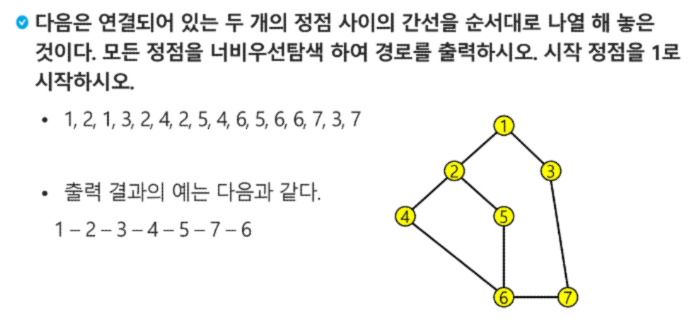

In [ ]:
# 7 8 
# 1 2 1 3 2 4 2 5 4 6 5 6 6 7 3 7
#--------------------------
def bfs(s, V):  # 시작정점 s, 마지막 정점 V
    visited = [0] * (V+1)   # visited 생성
    q = []          # 큐 생성
    q.append(s)     # 시작점 인큐
    visited[s] = 1  # 시작점 방문표시
    while q:        # 큐에 정점이 남아있으면 front != rear
        t = q.pop(0)    # 디큐
        print(t)        # 방문한 정점에서 할일
        for w in adj_l[t]:  # 인접한 정점 중 인큐되지 않은 정점 w가 있으면
            if visited[w]==0:
                q.append(w)     # w인큐, 인큐되었음을 표시
                visited[w] = visited[t] + 1


V, E = map(int, input().split()) # 1번부터 V번 정점, E개의 간선
arr = list(map(int, input().split()))
# 인접리스트 -------------------------
adj_l = [[] for _ in range(V+1)]
for i in range(E):
    v1, v2 = arr[i*2], arr[i*2+1]
    adj_l[v1].append(v2)
    adj_l[v2].append(v1)    # 방향이 없는 경우
# 여기까지 인접리스트 -----------------
bfs(1, 7)

In [ ]:
T = int(input())

def bfs(i,j,N):
    # 준비
    visited = [[0] * N for _ in range(N)] # visited 생성
    q = []    # 큐생성
    q.append([i,j])    # 시작점 인큐
    visited[i][j] = 1    # 시작점 방문 표시
    # 탐색
    while q:
        ti, tj = q.pop(0) # dequeue
        if maze[ti][tj] == 3:  # visit(t)
            return visited[ti][tj] - 1 - 1  # 시작점 1 빼고 경로 빈칸 수이기 때문에 이동거리 - 1
        for di,dj in [[0.1],[1,0],[0,-1],[-1,0]]:  # 인접이고 벽이 아니면 , 미로를 벗어나지 않고 
            wi,wj = ti+di, tj+dj
            if 0<= wi < N and 0<= wj < N and maze[wi][wj] != 1 and visited[wi][wj] == 0:
                q.append([wi,wj])  # 인큐
                visited[wi][wj] = visited[ti][tj] + 1    # 인큐표시
    return -1

def find_start(N):
    for i in range(N):
        for j in range(N):
            if maze[i][j] == 2:
                return i,j
            
for tc in range(1,T+1):
    N = int(input())
    maze = [list(map(int,input().split())) for _ in range(N)]

    sti,stj = find_start(N)
    ans = bfs(sti,stj,N)
    print(f'#{tc} {ans}')

In [ ]:
from collections import deque
 
def bfs(start):
    global q
    visited = [[0] * N for _ in range(N)]
 
    # 우 하 좌 상
    dr = [0, -1, 0, 1]
    dc = [1, 0, -1, 0]
 
    # 경로를 보자
    q.append(start)
    visited[start[0]][start[1]] = 1
 
    while q:
        row_col = q.popleft()
        r = row_col[0]
        c = row_col[1]
        # 찾았으면 숫자 내보내기
        # 이동 거리는 움직인 횟수 - 1
        if maze[r][c] == 3:
            return visited[r][c] - 1
        # 우 하 좌 상 인접점의 이동 여부 확인
        for k in range(4):
            nr = r + dr[k]
            nc = c + dc[k]
            if (0 <= nr < N) and (0 <= nc < N) and visited[nr][nc] == 0 and maze[nr][nc] != 1:
                # 이동 가능하면 enqueue
                q.append((nr, nc))
                # 이전 정점보다 +1이 되어야 하지만, 시작 정점과 그 인접점은 모두 1이여야 한다
                if r == start[0] and c == start[1]:
                    visited[nr][nc] = 1
                else:
                    visited[nr][nc] = visited[r][c] + 1
    return 0
 
 
T = int(input())
 
for tc in range(1, T + 1):
    q = deque()
    N = int(input())
    maze = [list(map(int, input())) for _ in range(N)]
 
    for i in range(N):
        for j in range(N):
            if maze[i][j] == 2:
                start = i, j
 
    ans  = bfs(start)
 
    print(f'#{tc} {ans}')